In [1]:
pip install yfinance


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np


ticker_data1 = yf.Ticker('GOOG')
ticker_data2 = yf.Ticker('MSFT')

In [4]:
import datetime as dt
from datetime import date, timedelta
today = date.today()
d1= today.strftime("%Y-%m-%d")
d2 = (today - timedelta(days=365)).strftime("%Y-%m-%d")
start_date=d2
end_date=d1

In [5]:
tickerDf1 = ticker_data1.history(period='1d', start='2018-01-01', end=end_date)
tickerDf2 = ticker_data2.history(period='1d', start='2018-01-01', end=end_date)

In [6]:
tickerDf1.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02 00:00:00-05:00,52.417000,53.347000,52.261501,53.250000,24752000,0.0,0.0
2018-01-03 00:00:00-05:00,53.215500,54.314499,53.160500,54.124001,28604000,0.0,0.0
2018-01-04 00:00:00-05:00,54.400002,54.678501,54.200100,54.320000,20092000,0.0,0.0
2018-01-05 00:00:00-05:00,54.700001,55.212502,54.599998,55.111500,25582000,0.0,0.0
2018-01-08 00:00:00-05:00,55.111500,55.563499,55.081001,55.347000,20952000,0.0,0.0


In [7]:
tickerDf2.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-03-08 00:00:00-05:00,407.959991,410.420013,404.329987,406.220001,17971700,0.0,0.0
2024-03-11 00:00:00-04:00,403.760010,405.679993,401.260010,404.519989,16120800,0.0,0.0
2024-03-12 00:00:00-04:00,407.619995,415.570007,406.790009,415.279999,22457000,0.0,0.0
2024-03-13 00:00:00-04:00,418.100006,418.179993,411.450012,415.100006,17090500,0.0,0.0
2024-03-14 00:00:00-04:00,420.125000,427.809998,417.989990,427.029999,22987770,0.0,0.0


In [8]:
pip install matplotlib 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


<Axes: title={'center': "Microsoft's stock price"}, xlabel='Date'>

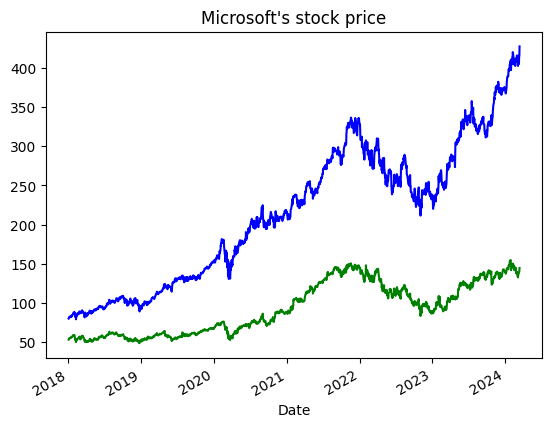

In [9]:
tickerDf1['Close'].plot(title="google's stock price" , color='green')
tickerDf2['Close'].plot(title="Microsoft's stock price" , color='blue')

In [10]:
tickerDf1.to_csv('google.csv')
tickerDf2.to_csv('microsoft.csv')

In [11]:
df1=tickerDf1
df2=tickerDf2
df1=df1.reset_index()
df1.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-01-02 00:00:00-05:00,52.417000,53.347000,52.261501,53.250000,24752000,0.0,0.0
1,2018-01-03 00:00:00-05:00,53.215500,54.314499,53.160500,54.124001,28604000,0.0,0.0
2,2018-01-04 00:00:00-05:00,54.400002,54.678501,54.200100,54.320000,20092000,0.0,0.0
3,2018-01-05 00:00:00-05:00,54.700001,55.212502,54.599998,55.111500,25582000,0.0,0.0
4,2018-01-08 00:00:00-05:00,55.111500,55.563499,55.081001,55.347000,20952000,0.0,0.0


In [12]:
df1=df1.drop(['Date','Dividends','Stock Splits'],axis=1)

In [13]:
df1.head()

,Open,High,Low,Close,Volume
0,52.417000,53.347000,52.261501,53.250000,24752000
1,53.215500,54.314499,53.160500,54.124001,28604000
2,54.400002,54.678501,54.200100,54.320000,20092000
3,54.700001,55.212502,54.599998,55.111500,25582000
4,55.111500,55.563499,55.081001,55.347000,20952000


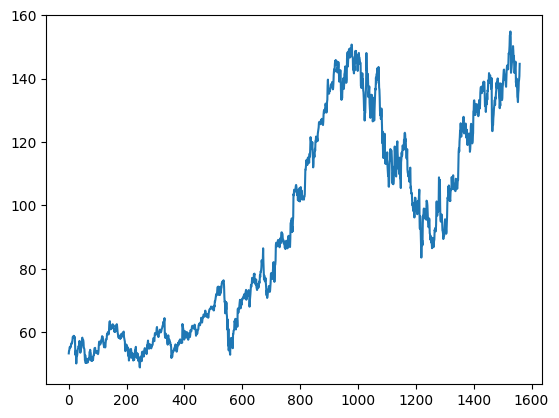

In [14]:
import matplotlib.pyplot as plt
plt.plot(df1.Close)


In [15]:
df1

,Open,High,Low,Close,Volume
0,52.417000,53.347000,52.261501,53.250000,24752000
1,53.215500,54.314499,53.160500,54.124001,28604000
2,54.400002,54.678501,54.200100,54.320000,20092000
3,54.700001,55.212502,54.599998,55.111500,25582000
4,55.111500,55.563499,55.081001,55.347000,20952000
...,...,...,...,...,...
1555,135.035004,138.985001,134.800003,136.289993,26472400
1556,137.070007,139.979996,137.070007,138.940002,22536400
1557,138.250000,140.279999,138.210007,139.619995,19019700
1558,140.059998,142.190002,140.009995,140.770004,19621600


In [16]:
ma100=df1.Close.rolling(100).mean()
ma200=df1.Close.rolling(200).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1555    139.148999
1556    139.133499
1557    139.119799
1558    139.134699
1559    139.191149
Name: Close, Length: 1560, dtype: float64

Text(0.5, 1.0, 'Original vs MA100 vs MA200')

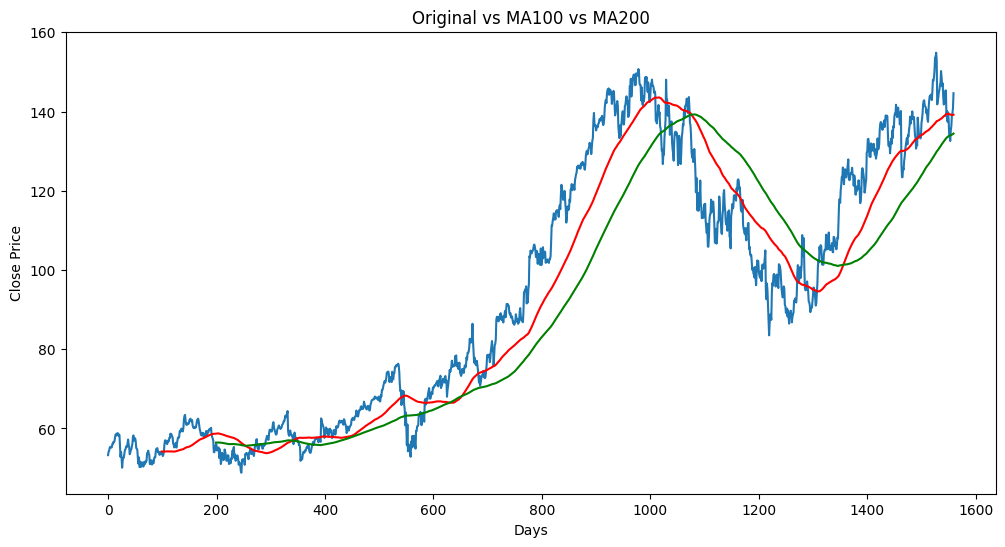

In [21]:
plt.figure(figsize=(12,6))
plt.plot(df1.Close)
plt.plot(ma100,'red',label='Original vs MA100 vs MA200')
plt.plot(ma200,'green')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.title('Original vs MA100 vs MA200')




In [17]:
df1.shape

(1556, 5)

In [18]:
#Spliting data into training and testing
d_train=pd.DataFrame(df1['Close'][0:int(len(df1)*0.70)])
d_testing=pd.DataFrame(df1['Close'][int(len(df1)*0.70):int(len(df1))])
print(d_train.shape)
print(d_testing.shape)
d_train.head()
d_testing.head()


(1089, 1)
(467, 1)


,Close
1089,114.966499
1090,117.156998
1091,118.129501
1092,122.574997
1093,116.746498


In [19]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [21]:
d_train_array=scaler.fit_transform(d_train)
d_train_array

array([[0.04356316],
       [0.05214037],
       [0.05406386],
       ...,
       [0.69378198],
       [0.64976251],
       [0.69285461]])

In [22]:
d_train_array.shape

(1089, 1)

In [23]:
x_train=[]
y_train=[]

for i in range(100,d_train_array.shape[0]):
    x_train.append(d_train_array[i-100:i])
    y_train.append(d_train_array[i,0])

x_train,y_train =np.array(x_train),np.array(y_train)


In [1]:
#ml model
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [2]:
model=Sequential()
model.add(LSTM(units=5,activation='relu',return_sequences=True,
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=5,activation='relu',return_sequences=True,
               ))
model.add(Dropout(0.2))

model.add(LSTM(units=5,activation='relu',return_sequences=True,
               ))
model.add(Dropout(0.2))

model.add(LSTM(units=5,activation='relu',return_sequences=True,
               ))
model.add(Dropout(0.2))

NameError: name 'x_train' is not defined